# See if constantly tweeting makes people more negative!

## Setup

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm

# Folder to get stuff from
name = 'Test'

## Go

In [2]:
# load the data
data = pd.read_csv('./'+name+'/activity.csv')
data

,Is_retweet,Is_quote,Is_reply,Retweets,Favorites,Created,Time_since_last,Streak of 0:30:00,Streak of 6:00:00,Per 1:00:00,"Per 1 day, 0:00:00",Predicted_polarity,User
0,True,False,False,1,0,2021-05-20 02:52:07,2 days 12:09:26,1,1,1,1,0.0000,840727059001417728
1,False,True,False,0,1,2021-05-17 14:42:41,0 days 00:00:38,2,2,2,2,0.6705,840727059001417728
2,False,False,True,0,1,2021-05-17 14:42:03,10 days 14:15:05,2,2,2,2,0.5719,840727059001417728
3,False,True,False,0,4,2021-05-07 00:26:58,0 days 00:09:20,2,2,2,2,0.3818,840727059001417728
4,False,False,True,1,6,2021-05-07 00:17:38,6 days 12:42:47,2,2,2,2,0.0000,840727059001417728
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,False,False,False,0,0,2019-08-27 14:40:02,0 days 21:11:01,1,1,1,1,-0.1531,196290445
2639,False,False,False,0,1,2019-08-26 17:29:01,4 days 00:36:28,1,1,1,1,-0.2960,196290445
2640,False,False,True,0,1,2019-08-22 16:52:33,0 days 00:00:48,2,2,2,2,0.7177,196290445
2641,True,False,False,2,0,2019-08-22 16:51:45,3 days 02:50:46,2,2,2,2,0.0000,196290445


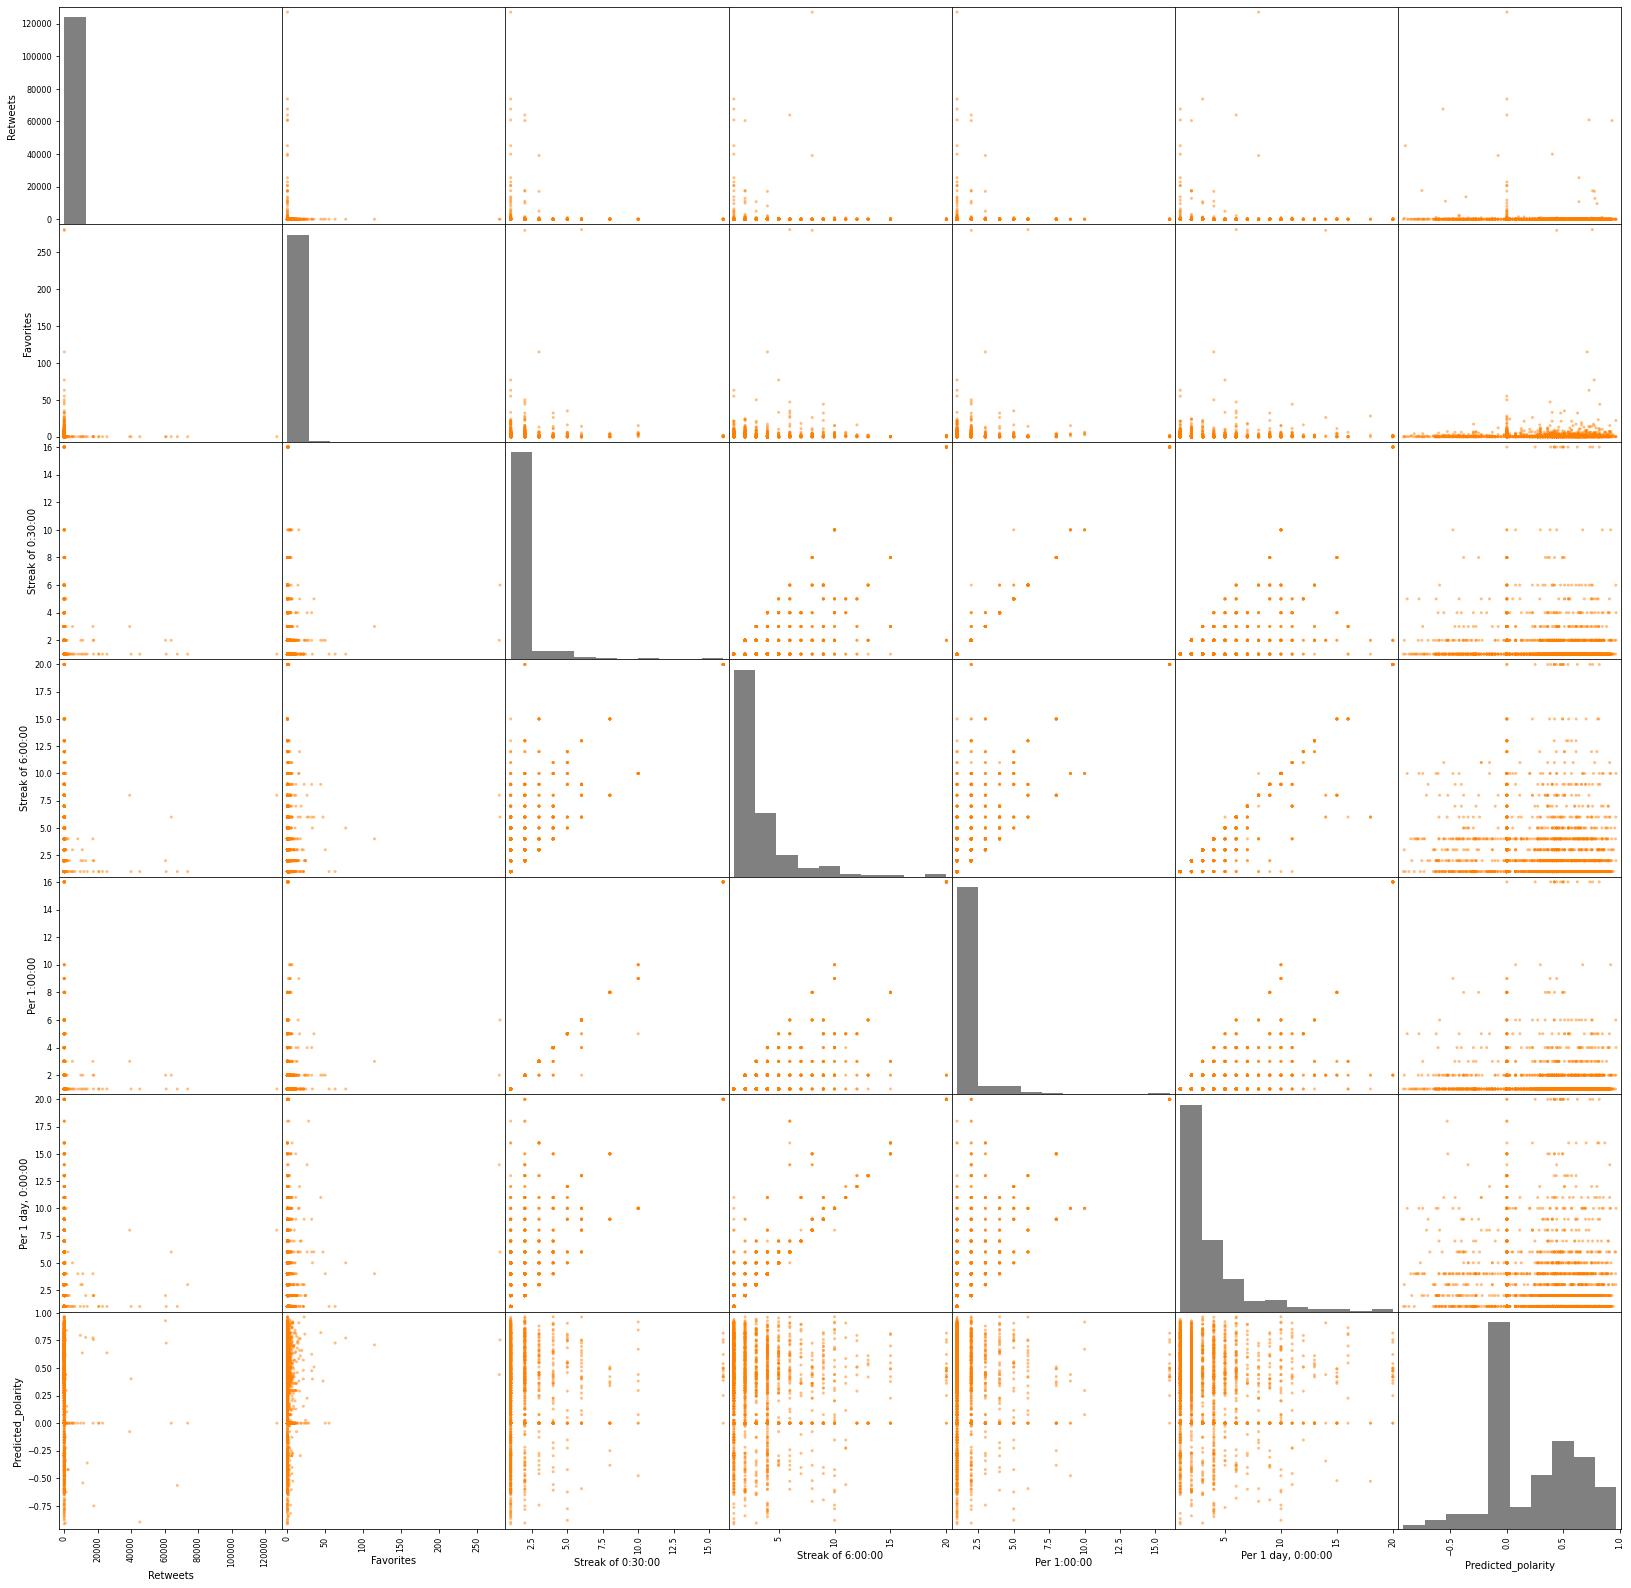

In [3]:
pd.plotting.scatter_matrix(data[['Retweets','Favorites','Created','Time_since_last','Streak of 0:30:00','Streak of 6:00:00','Per 1:00:00','Per 1 day, 0:00:00','Predicted_polarity']], 
                           figsize = (28,28), c='#FF7F00', hist_kwds={'color':'#808080'})
plt.show()

In [4]:
fit = sm.OLS(np.array(data.Predicted_polarity), sm.add_constant(np.array(data[['Per 1:00:00']]))).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.280
Date:                Fri, 28 May 2021   Prob (F-statistic):             0.0123
Time:                        20:13:21   Log-Likelihood:                -1078.6
No. Observations:                2643   AIC:                             2161.
Df Residuals:                    2641   BIC:                             2173.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2209      0.010     22.196      0.000       0.201       0.240
x1             0.0112      0.004      2.506      0.012       0.002       0.020
==============================================================================
Omnibus:                       33.159   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.706
Skew:                          -0.100   Prob(JB):                     1.17e-05
Kurtosis:                       2.593   Cond. No.                         3.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""